In [79]:
import pandas as pd

In [80]:
data = pd.read_csv("diabetes_risk_prediction_dataset.csv")
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [81]:
data.shape

(520, 17)

In [82]:
# here we can notice appart from age every variable is binary
for var in data.columns: 
    print(data[var].value_counts())

Age
35    30
48    28
30    25
43    25
40    24
55    22
47    21
38    20
53    20
45    18
58    18
50    18
54    16
39    16
57    15
60    15
68    10
28     9
42     9
72     9
66     9
36     8
61     8
56     8
46     8
67     8
62     7
37     7
49     7
44     7
27     6
34     6
65     6
32     5
69     5
51     5
70     5
64     5
33     4
59     4
41     4
52     4
63     3
31     3
90     2
85     2
25     2
79     1
16     1
29     1
26     1
Name: count, dtype: int64
Gender
Male      328
Female    192
Name: count, dtype: int64
Polyuria
No     262
Yes    258
Name: count, dtype: int64
Polydipsia
No     287
Yes    233
Name: count, dtype: int64
sudden weight loss
No     303
Yes    217
Name: count, dtype: int64
weakness
Yes    305
No     215
Name: count, dtype: int64
Polyphagia
No     283
Yes    237
Name: count, dtype: int64
Genital thrush
No     404
Yes    116
Name: count, dtype: int64
visual blurring
No     287
Yes    233
Name: count, dtype: int64
Itching
No     267
Yes  

In [83]:
#we can see there are no missing values in this data
data[data.columns].isnull().sum().sort_values(ascending=False)

Age                   0
Itching               0
Obesity               0
Alopecia              0
muscle stiffness      0
partial paresis       0
delayed healing       0
Irritability          0
visual blurring       0
Gender                0
Genital thrush        0
Polyphagia            0
weakness              0
sudden weight loss    0
Polydipsia            0
Polyuria              0
class                 0
dtype: int64

In [84]:
#Replace all binary variables with 0 and 1

data["Gender"] = data["Gender"].replace({"Male": 1, "Female": 0})
data["class"] = data["class"].replace({"Positive": 1, "Negative": 0})
data.replace({'Yes': 1, 'No': 0}, inplace=True)
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


<Axes: >

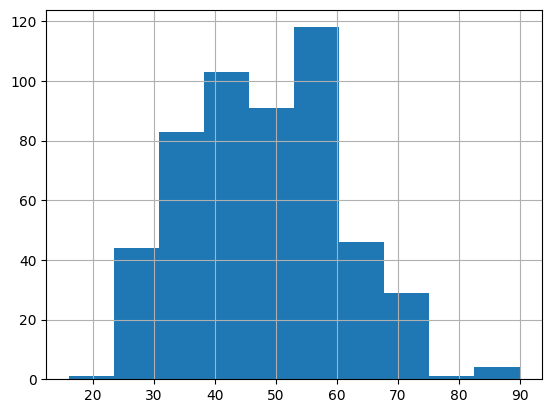

In [85]:
data.Age.hist()

<Axes: >

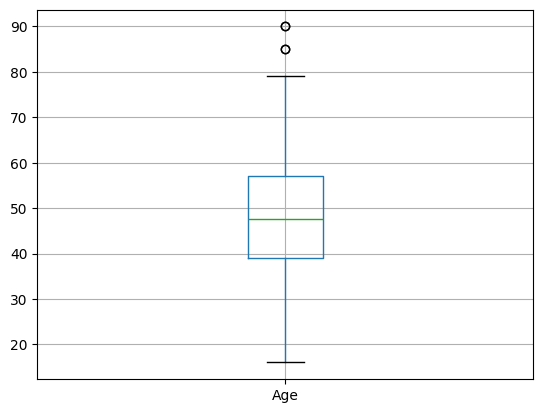

In [86]:
data.boxplot(column = "Age")

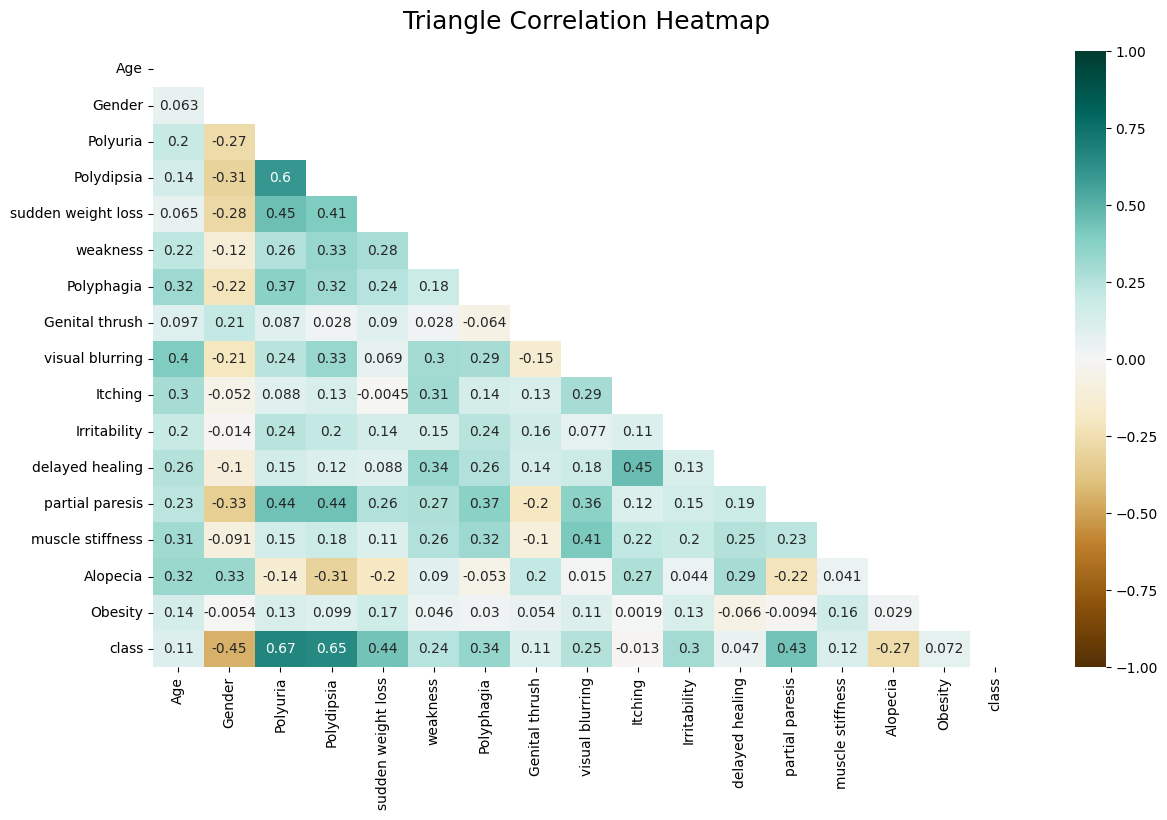

In [87]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool_))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

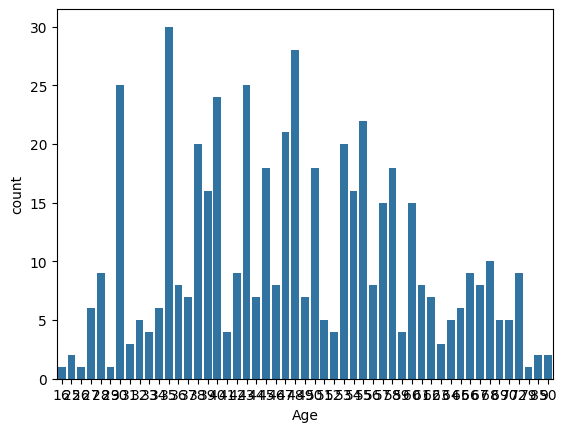

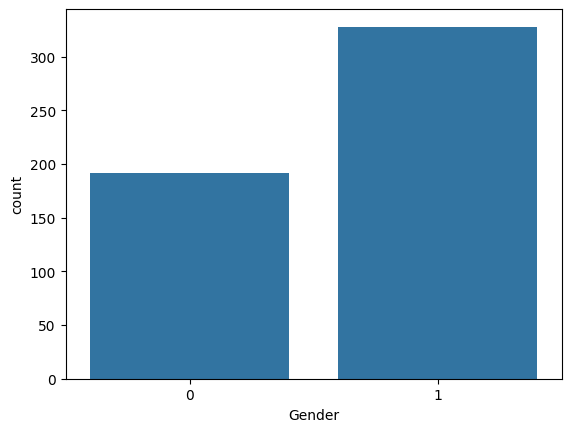

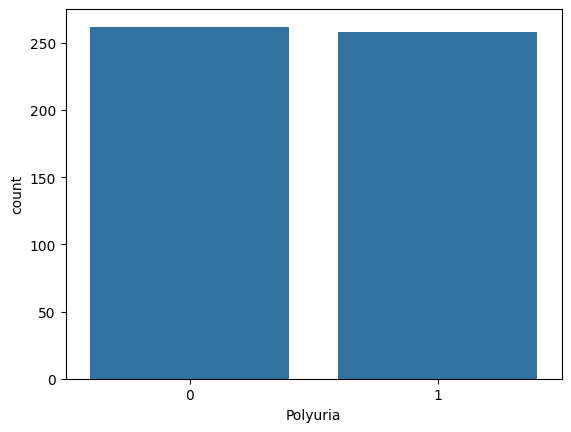

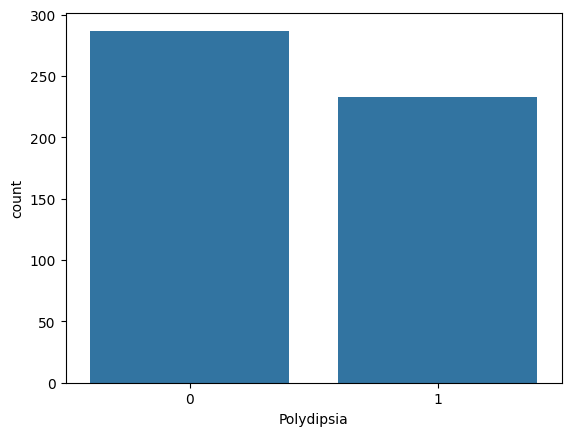

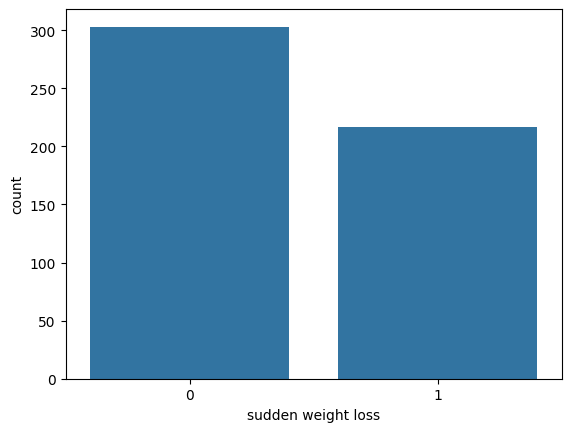

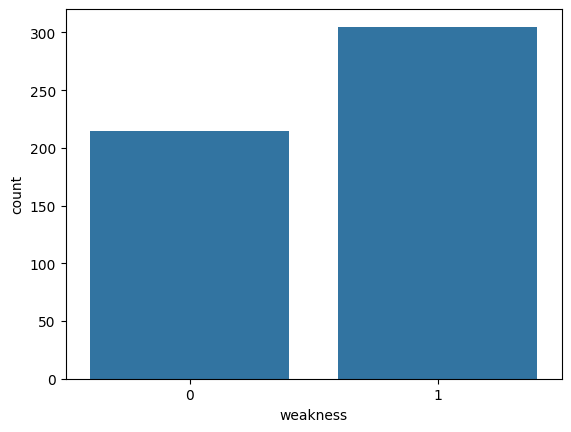

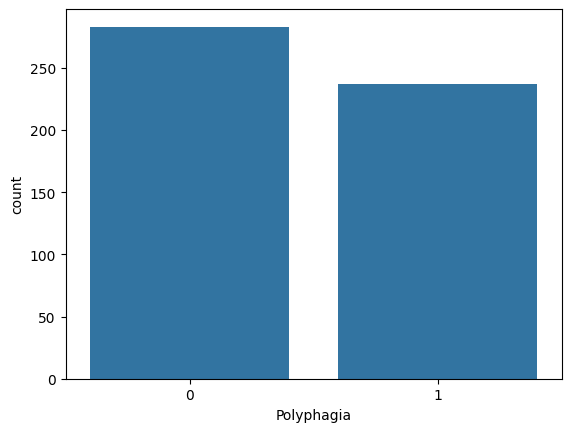

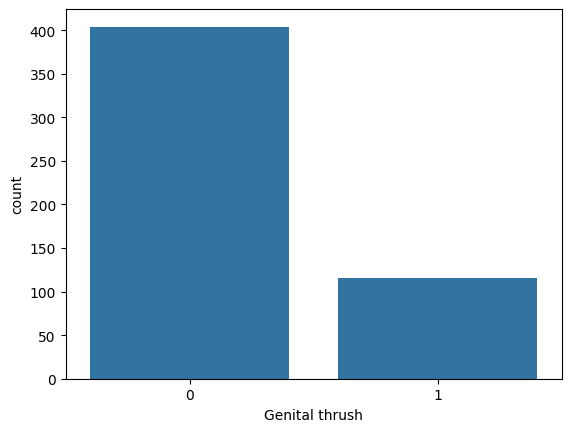

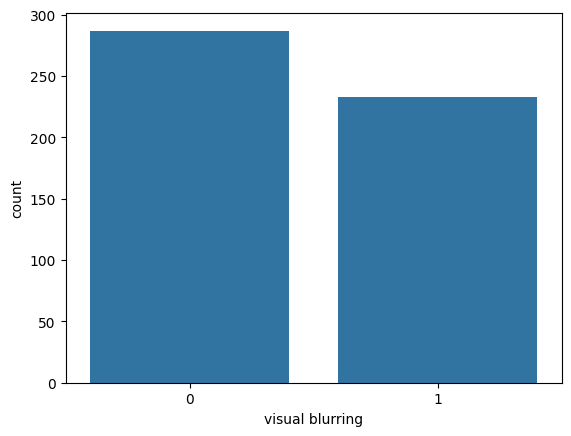

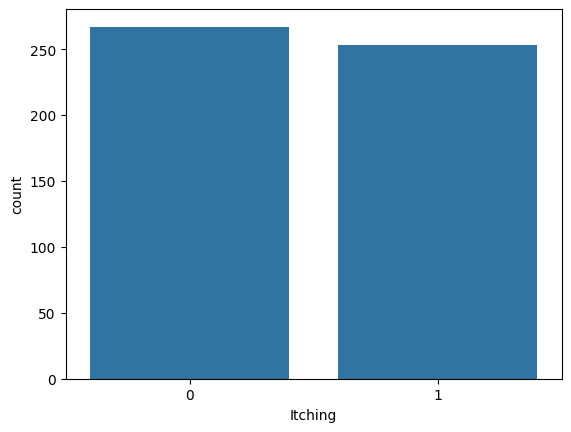

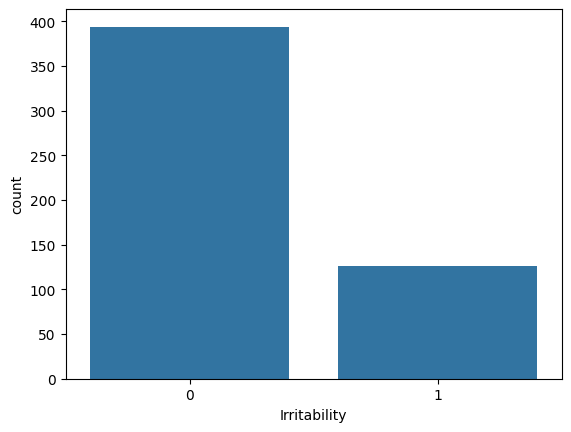

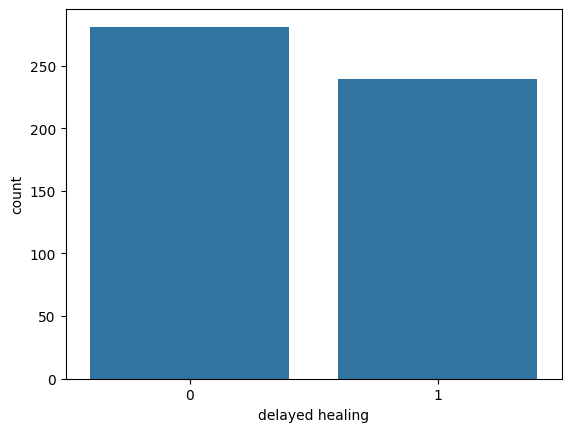

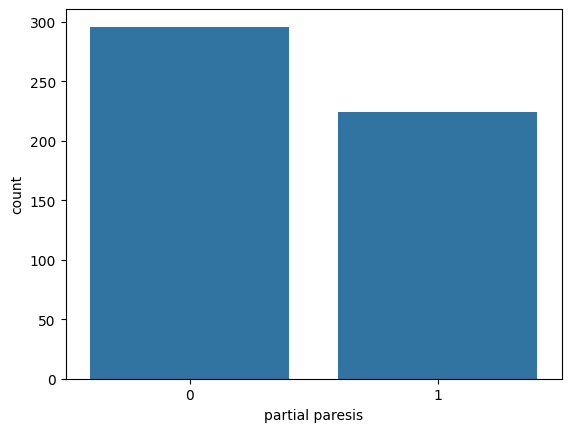

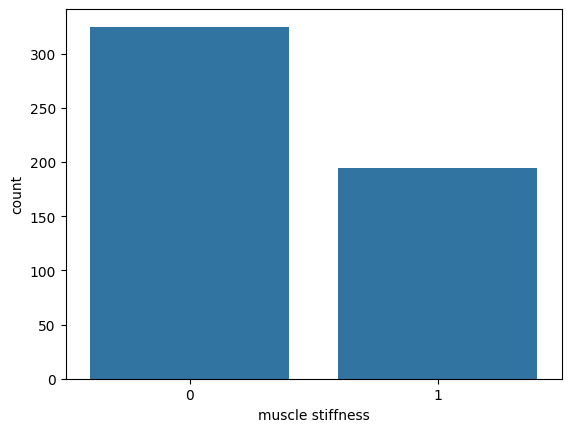

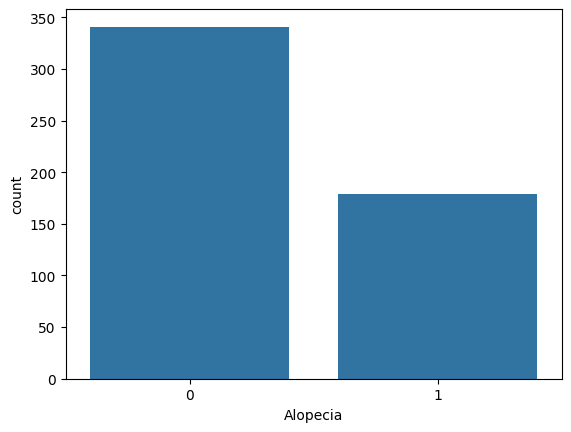

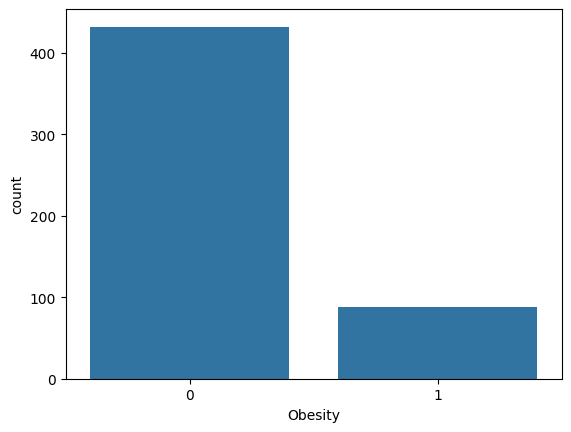

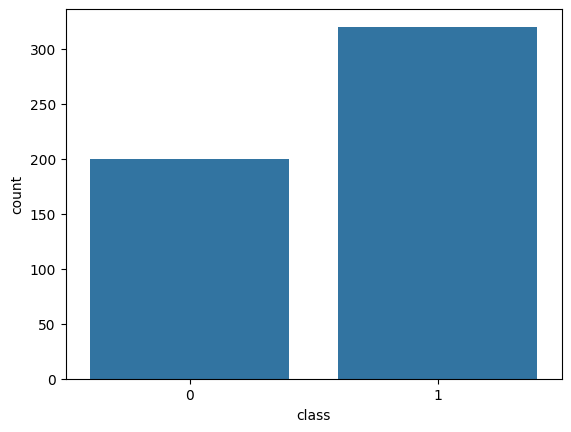

In [88]:

for col in data.columns:
    sns.barplot(x = data[col].value_counts().index, y = data[col].value_counts())
    plt.show()

In [89]:
pivot_result = data.pivot_table(index="Age", values="class").sort_values(by="class", ascending=False)
pivot_result

,class
Age,
16,1.000000
41,1.000000
85,1.000000
79,1.000000
69,1.000000
63,1.000000
62,1.000000
25,1.000000
48,1.000000


<Axes: >

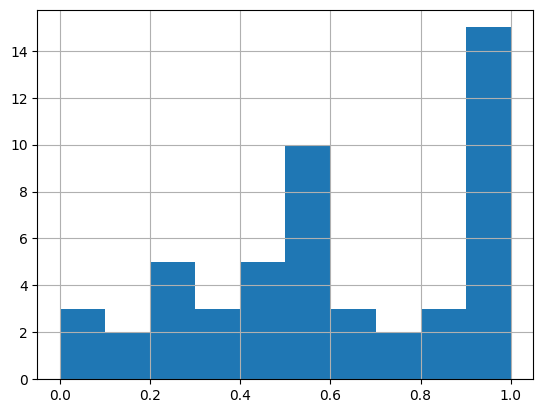

In [90]:
pivot_result["class"].hist()

In [91]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [92]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

data_scaled.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0.324324,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
1,0.567568,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.337838,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3,0.391892,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.594595,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

X = data_scaled.drop(columns="class")
y = data_scaled["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Add more models to the list
models = [
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC(),
    KNeighborsClassifier(),
    LogisticRegression(),
    GaussianNB(),
    MultinomialNB(),
    DecisionTreeClassifier(),
    MLPClassifier(max_iter=1000),  # Neural Network
]

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f"{model.__class__.__name__} Accuracy: {accuracy:.4f} and Recall: {recall:.4f}")

RandomForestClassifier Accuracy: 0.9936 and Recall: 0.9902
GradientBoostingClassifier Accuracy: 0.9872 and Recall: 0.9804
SVC Accuracy: 0.9744 and Recall: 0.9706
KNeighborsClassifier Accuracy: 0.9103 and Recall: 0.8922
LogisticRegression Accuracy: 0.9359 and Recall: 0.9510
GaussianNB Accuracy: 0.9103 and Recall: 0.9314
MultinomialNB Accuracy: 0.9103 and Recall: 0.9608
DecisionTreeClassifier Accuracy: 0.9744 and Recall: 0.9804
MLPClassifier Accuracy: 0.9808 and Recall: 0.9804


## We can notice here that the best results are from the RandomForestClassifier

## Lets do some parameter study to find the best parameters and then lets take a look at the wrong predictions

In [94]:
from sklearn.model_selection import GridSearchCV


# Create the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the model on the test set
accuracy = best_rf_model.score(X_test, y_test)
print("Test Accuracy:", accuracy)

Fitting 3 folds for each of 486 candidates, totalling 1458 fits


[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None

In [95]:
from sklearn.metrics import classification_report
print(best_rf_model)

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

RandomForestClassifier(bootstrap=False, min_samples_split=5, n_estimators=200)
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        54
         1.0       1.00      0.99      1.00       102

    accuracy                           0.99       156
   macro avg       0.99      1.00      0.99       156
weighted avg       0.99      0.99      0.99       156



## lets take a look at the wrong predictions

In [117]:
# Convert y_test to a DataFrame and reset the index
y_test_df = pd.DataFrame({'True Label': y_test})
y_test_df.reset_index(drop=True, inplace=True)
X_test_df = pd.DataFrame(X_test, columns=data.columns)
X_test_df.reset_index(drop=True, inplace=True)

# Convert y_pred to a DataFrame
y_pred_df = pd.DataFrame({'Predicted Label': y_pred})

# Concatenate the DataFrames along the columns
result_df = pd.concat([y_test_df, y_pred_df], axis=1)

# Find indices of misclassified instances
misclassified_indices = result_df[result_df['True Label'] != result_df['Predicted Label']].index

# Print misclassified instances
for index in misclassified_indices:
    true_label = result_df.at[index, 'True Label']
    predicted_label = result_df.at[index, 'Predicted Label']
    
    # Extract features for the misclassified instance
    features = data.loc[68]
    #features = data.loc[index+1]
    #features = X_test_df.loc[index]
    
    print(f"Index: {index}, True Label: {true_label}, Predicted Label: {predicted_label}")
    print("Features:")
    print(features)
    print("\n")

Index: 35, True Label: 1.0, Predicted Label: 0.0
Features:
Age                   25
Gender                 0
Polyuria               0
Polydipsia             0
sudden weight loss     0
weakness               1
Polyphagia             1
Genital thrush         0
visual blurring        1
Itching                0
Irritability           0
delayed healing        0
partial paresis        0
muscle stiffness       0
Alopecia               1
Obesity                0
class                  1
Name: 68, dtype: int64


